In [3]:
import codecs
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

from scipy.optimize import minimize

import sys
sys.path.append('../toolbox')
from exact_barycenter import *
from softmax import *
from misc import *
from knn import *



In [4]:
def read_data(filename):
    dataFile = codecs.open(filename)
    text = dataFile.readlines()
    
    data = []
    labels = []

    for line in text:
        new = [float(x) for x in line.split()[1:]]
        data.append(new)
        labels.append(float(line.split()[0]))

    data = np.array(data)
    labels = np.array(labels)
    ys = np.zeros(len(labels))
    ys[np.where(labels == 2.0)] = 1

    support, psds = signal.periodogram(data)
    
    normalize = np.sum(psds, axis=1)
    psds += 1e-20
    psds = (psds.transpose() / normalize).transpose()
    
    return data, psds, ys, support

#data_test, X_te, y_te, support = read_data('Data/GunPoint/GunPoint_TEST.txt')
#data_train, X_tr, y_tr, sss = read_data('Data/GunPoint/GunPoint_TRAIN.txt')
#print(len(y_te), len(y_tr))

data_test, X_te, y_te, support = read_data('Data/GunPointOldVersusYoung/GunPointOldVersusYoung_TEST.txt')
data_train, X_tr, y_tr, sss = read_data('Data/GunPointOldVersusYoung/GunPointOldVersusYoung_TRAIN.txt')


X = np.vstack((X_tr, X_te))
y = np.hstack((y_tr, y_te))
print(X.shape, y.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/GunPointOldVersusYoung/GunPointOldVersusYoung_TEST.txt'

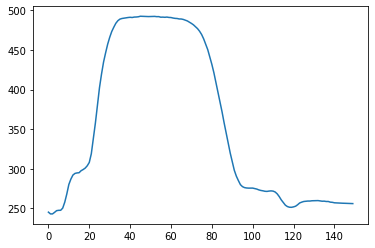

In [27]:
plt.plot(data_train[20,:])

In [28]:
print(support.shape)
print(X_tr.shape)

# shuffle it
np.random.seed(123)
idx = np.arange(len(y_tr))
np.random.shuffle(idx)
X_tr = X_tr[idx, :]
y_tr = y_tr[idx]
y_tr = y_tr.reshape(-1,)

(76,)
(136, 76)


In [29]:
options_q = {'q_support': 1000}
x0 = np.ones((2+1)*2)
seeds = np.arange(10)
methods = ['quantile', 'euclidean', 'KL']
scores = np.zeros((len(seeds), len(methods)))


for i, m in enumerate(methods):
    for seed in seeds:
        X_tr, X_te, y_tr, y_te = random_split(X, y, 0.8, seed=seed)
        y_tr = y_tr.reshape(-1,)
    
        model = WSoftmax(X_tr, y_tr, support, distance=m, quadratic=False, options=options_q)
        res = minimize(fun=model.logp, x0=x0, jac=model.dlogp, method='L-BFGS-B')
        theta = res['x']
        prob, pred = model.pred(X_te, theta)
        scores[seed, i] = np.sum(pred.reshape(y_te.shape) == y_te) / len(y_te)
    


In [30]:
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0) / np.sqrt(len(seeds)))

[0.70444444 0.63333333 0.61333333]
[0.01177987 0.01805342 0.01455513]


In [31]:
seeds = np.arange(10)
methods = ['quantile', 'euclidean', 'KL']
scores = np.zeros((len(seeds), len(methods)))


for seed in seeds:
    for j, m in enumerate(methods):
        X_tr, X_te, y_tr, y_te = random_split(X, y, 0.8, seed=seed)
        y_tr = y_tr.reshape(-1,)
        n_te, D = X_te.shape
        results = np.zeros(n_te)
        for i in range(n_te):
            idx_neighbors = getNeighbors(X_tr, X_te[i, :], 6, m, support)
            result = getResponse(y_tr[idx_neighbors])
            results[i] = result
            scores[seed, j] = np.sum(results.reshape(y_te.shape) == y_te) / len(y_te)

In [32]:
print(np.mean(scores, axis=0))
print(np.std(scores, axis=0) / np.sqrt(len(seeds)))

[0.93777778 0.86       0.93777778]
[0.0068853  0.00756862 0.00756862]


In [ ]:
n_te, D = X_te.shape
results = np.zeros(n_te)

for i in range(n_te):
    idx_neighbors = getNeighbors(X_tr, X_te[i, :], 55, 'KL', support)
    result = getResponse(y_tr[idx_neighbors])
    results[i] = result
print(np.sum(results.reshape(y_te.shape) == y_te) / len(y_te))

In [ ]:
n_te, D = X_te.shape
results = np.zeros(n_te)
for i in range(n_te):

    idx_neighbors = getNeighbors(X_tr, X_te[i, :], 5, 'euclidean', support)
    result = getResponse(y_tr[idx_neighbors])
    results[i] = result
print(np.sum(results.reshape(y_te.shape) == y_te) / len(y_te))

In [ ]:
plt.plot(X_te[:3,:].transpose())

In [ ]:
print(X_te[1,:])

In [ ]:
def KL(x1, x2):
    return np.sum(x2 * np.log(x1 / x2))

In [ ]:
distances = []
for x in X_tr[]

In [ ]:
plt.plot(X_tr[y_tr==1,:].transpose())
plt.show()